# Clustering Lab

 
Based of the amazing work you did in the Movie Industry you've been recruited to the NBA! You are working as the VP of Analytics that helps support a head scout, Mr. Rooney, for the worst team in the NBA probably the Wizards. Mr. Rooney just heard about Data Science and thinks it can solve all the team's problems!!! He wants you to figure out a way to find players that are high performing but maybe not highly paid that you can steal to get the team to the playoffs! 

In this document you will work through a similar process that we did in class with the NBA data (NBA_Perf_22 and nba_salaries_22), merging them together.

Details: 

- Determine a way to use clustering to estimate based on performance if 
players are under or over paid, generally. 

- Then select players you believe would be best for your team and explain why. Do so in three categories: 
    * Examples that are not good choices (3 or 4) 
    * Several options that are good choices (3 or 4)
    * Several options that could work, assuming you can't get the players in the good category (3 or 4)

- You will decide the cutoffs for each category, so you should be able to explain why you chose them.

- Provide a well commented and clean report of your findings in a separate notebook that can be presented to Mr. Rooney, keeping in mind he doesn't understand...anything. Include a rationale for variables you included in the model, details on your approach and a overview of the results with supporting visualizations. 


Hints:

- Salary is the variable you are trying to understand 
- When interpreting you might want to use graphs that include variables that are the most correlated with Salary
- You'll need to scale the variables before performing the clustering
- Be specific about why you selected the players that you did, more detail is better
- Use good coding practices, comment heavily, indent, don't use for loops unless totally necessary and create modular sections that align with some outcome. If necessary create more than one script,list/load libraries at the top and don't include libraries that aren't used. 
- Be careful for non-traditional characters in the players names, certain graphs won't work when these characters are included.


In [1]:
# Loading packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data 
salary_data = pd.read_csv('2025_salaries.csv', header=1, encoding='latin-1') # header=1 makes the second row the header
stats = pd.read_csv('nba_2025.txt', sep=",", encoding='latin-1') #The sep argument indicates that commas are beng used to separate multiple values

In [3]:
#Drop variables that will not be needed or are duplicate

# Merge the two datasets  
merged_data = pd.merge(salary_data, stats, on='Player')

# Find duplicates within the merged dataset
duplicates = merged_data[~merged_data.duplicated(subset='Player', keep=False)]

#merged_data.columns.tolist()

#Remove columns that are not needed for clustering and do not impact the analysis.
# Keeping columns: Player (This is needed to ensure the players can be identified after finding the results)

duplicates = duplicates.drop(['GS', 'Rk', 'Team', 'Awards', 'Player-additional', 'Trp-Dbl', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', '2P%', '3P%'], axis=1) # inplace = True changes original object directly
# duplicates.columns.tolist()

duplicates['2025-26'] = (duplicates['2025-26'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()) #convert salary to numeric
duplicates['2025-26'] = pd.to_numeric(duplicates['2025-26'])
duplicates.dropna(inplace=True)

print(duplicates['2025-26'].isna().sum())

0


In [6]:
#Run the clustering algo with your best guess for K
scaler = StandardScaler() #standard scaler is to standardize the data
# duplicates.info()

# Features can only take numerical values, so I will be leaving out all values that are non-numerical (strings)
features = ['G', 'MP', 'TRB', 'PTS', 'Age', 'FG%', 'eFG%', 'FT%', 'AST', 'STL', 'BLK', 'TOV', 'PF'] 
duplicates_scaled = scaler.fit_transform(duplicates[features])

#Run k-means clustering with my initial guess being K=3
kmeans = KMeans(n_clusters=3, random_state=42, verbose=1) #There are 3 clusters, random_state is to reproduce the same results
kmeans.fit(duplicates_scaled)

Initialization complete
Iteration 0, inertia 4001.7452071439393.
Iteration 1, inertia 2778.2182995748685.
Iteration 2, inertia 2724.0194398281205.
Iteration 3, inertia 2709.781851687993.
Iteration 4, inertia 2701.2579934768255.
Iteration 5, inertia 2697.2436213577757.
Iteration 6, inertia 2694.172670502308.
Iteration 7, inertia 2692.611506813183.
Iteration 8, inertia 2692.536304553427.
Converged at iteration 8: strict convergence.


,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",1
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [7]:
#View the results
# print cluster centers and labels
print(kmeans.cluster_centers_)
print(kmeans.labels_)

#Assign the cluster labels in the original dataframe
duplicates['cluster'] = kmeans.labels_
print(duplicates[['Player', 'PTS','2025-26', 'cluster']].head(20))

[[ 0.7146167   0.88293787  0.73279558  0.81498483 -0.08719056  0.11821985
   0.1125034   0.13944598  0.7097717   0.77876962  0.47288666  0.78835791
   0.80600978]
 [-0.70249062 -0.85336487 -0.36405611 -0.77509436  0.2479814   1.27730121
   1.12752409 -0.77633316 -0.76767677 -0.79925247 -0.08428264 -0.75018668
  -0.63364588]
 [-0.58548714 -0.72964625 -0.75308326 -0.6788881   0.001891   -0.69407852
  -0.6227965   0.15971732 -0.55153951 -0.62360599 -0.55054277 -0.65652943
  -0.72837443]]
[2 1 1 2 2 1 2 0 2 2 2 2 0 2 2 0 1 1 1 2 0 2 2 0 2 1 0 0 1 1 2 2 2 0 2 2 2
 0 2 0 2 0 2 2 2 1 2 2 0 1 0 2 2 2 1 0 0 0 1 1 2 2 0 1 1 2 2 2 1 2 0 1 0 2
 2 1 2 2 2 1 1 0 0 0 0 0 0 1 0 1 2 0 1 0 2 0 0 2 2 0 2 2 2 2 2 2 2 2 1 0 2
 0 0 0 2 0 2 2 1 2 1 2 0 1 0 2 2 2 2 2 0 2 2 0 1 0 2 2 1 0 2 0 2 0 2 0 2 1
 2 2 2 2 2 1 1 0 0 1 1 0 0 2 2 2 2 2 0 2 0 0 2 1 0 2 0 0 0 0 2 2 0 1 2 1 0
 0 2 0 0 0 0 2 0 2 2 2 2 1 2 0 2 1 0 0 2 0 1 0 0 0 1 0 2 0 2 1 0 0 2 0 2 0
 1 2 0 2 0 1 2 0 2 1 0 0 0 0 0 0 0 2 0 2 2 2 1 0 1 0 2 0 2 2

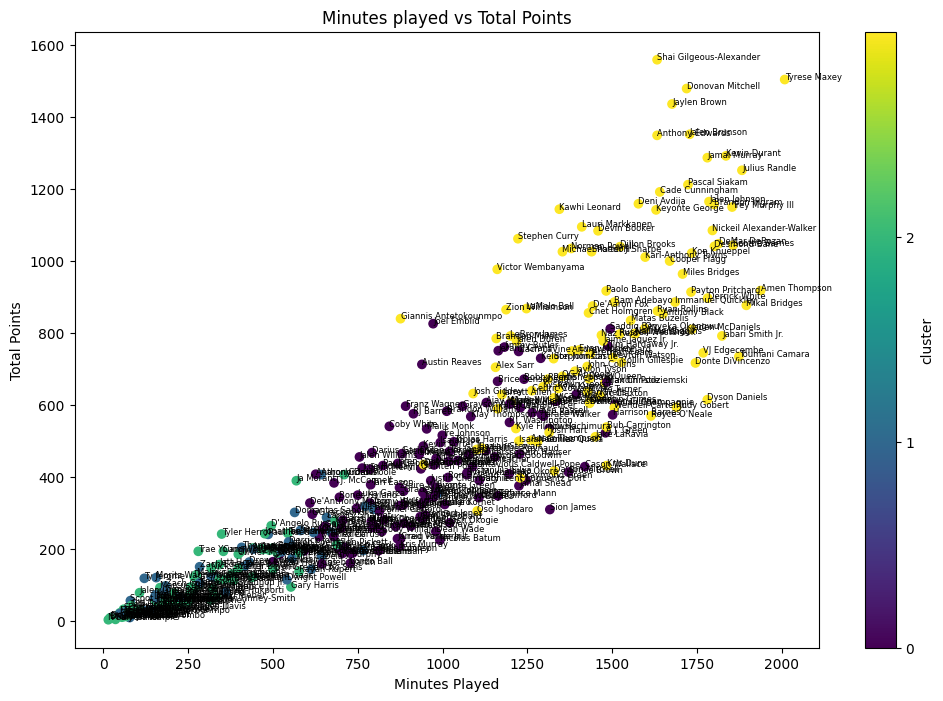

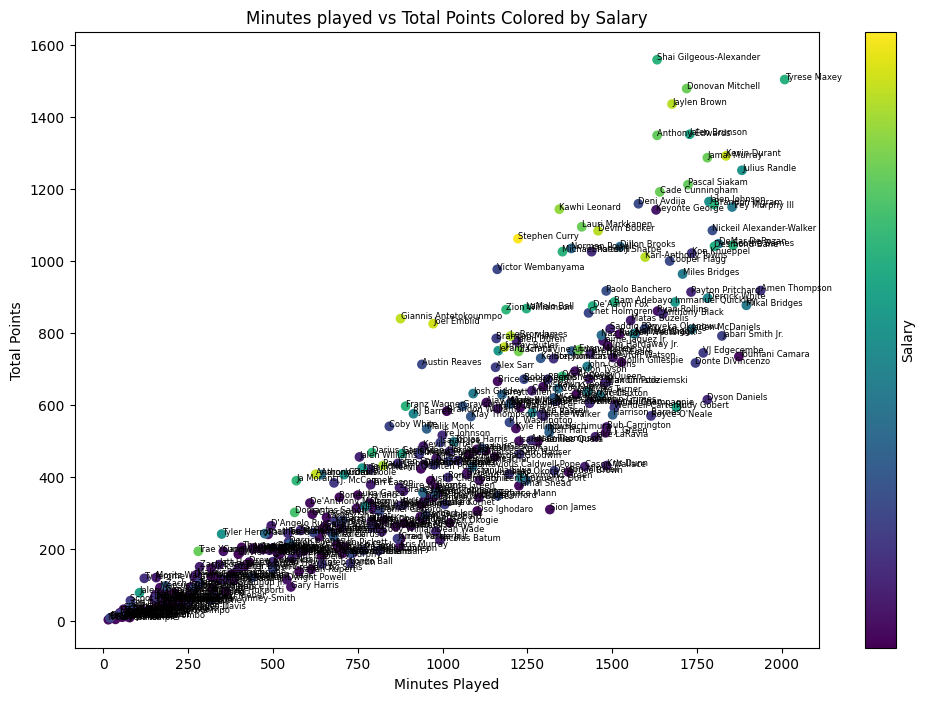

In [15]:
#Create a visualization of the results with 2 or 3 variables that you think will best
#differentiate the clusters

plt.figure(figsize=(12, 8))
scatter = plt.scatter(duplicates['MP'], duplicates['PTS'], c=duplicates['cluster'], cmap='viridis')

plt.colorbar(scatter, label='cluster', ticks=[0, 1, 2]) #There are only 3 clusters, so the colorbar shows exactly which cluster players are in based on the color

for i, row in duplicates.iterrows():
    plt.annotate(row['Player'],(row['MP'],row['PTS']), fontsize=6)
plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Minutes played vs Total Points')
plt.show()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(duplicates['MP'], duplicates['PTS'], c=duplicates['2025-26'], cmap='viridis')

plt.colorbar(scatter, label='Salary', ticks=[0, 1, 2]) #There are only 3 clusters, so the colorbar shows exactly which cluster players are in based on the color

for i, row in duplicates.iterrows():
    plt.annotate(row['Player'],(row['MP'],row['PTS']), fontsize=6)
plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Minutes played vs Total Points Colored by Salary')
plt.show()

In [9]:
#Evaluate the quality of the clustering using total variance explained and silhouette scores
from sklearn.metrics import silhouette_score

#Begin calculating silhouette score
sil_score = silhouette_score(duplicates_scaled, kmeans.labels_)
print("Silhouette Score: ", sil_score)

# Calculate the total variance - the goal is to get the highest variance
total_variance = kmeans.inertia_
print("Total Variance: ", total_variance)

Silhouette Score:  0.22445653747763164
Total Variance:  2692.536304553427


In [10]:
#Determine the ideal number of clusters using the elbow method and the silhouette coefficient
inertias = []
k_values = range(1, 10) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(duplicates_scaled)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

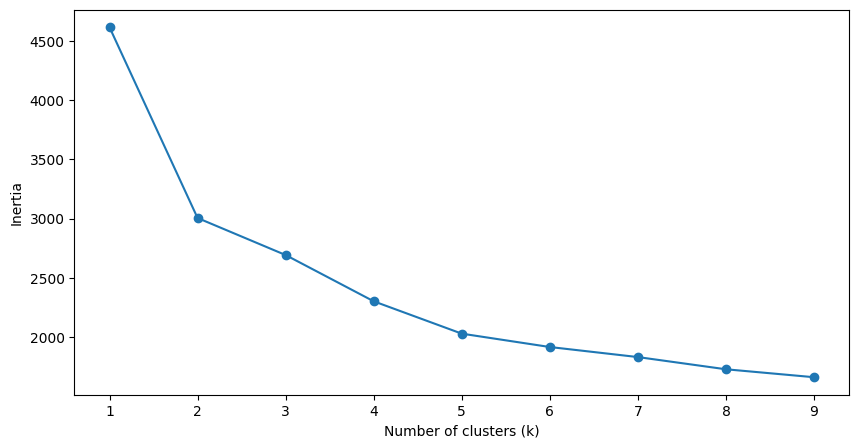

In [11]:
#Visualize the results of the elbow method
plt.figure(figsize=(10,5))
plt.plot(k_values, inertias, marker = 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

#help(plt.scatter)

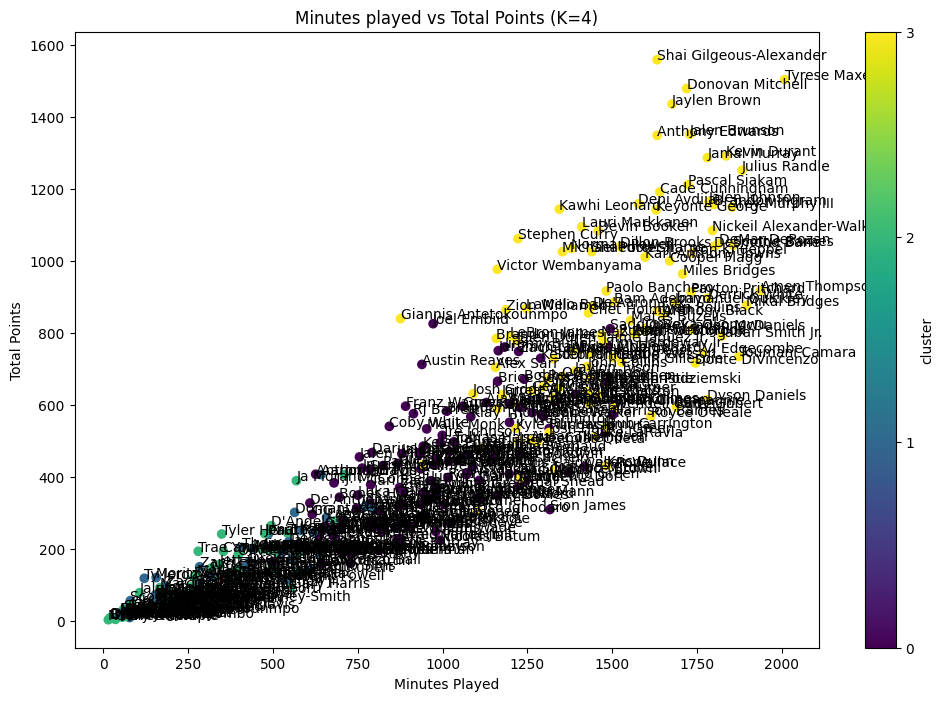

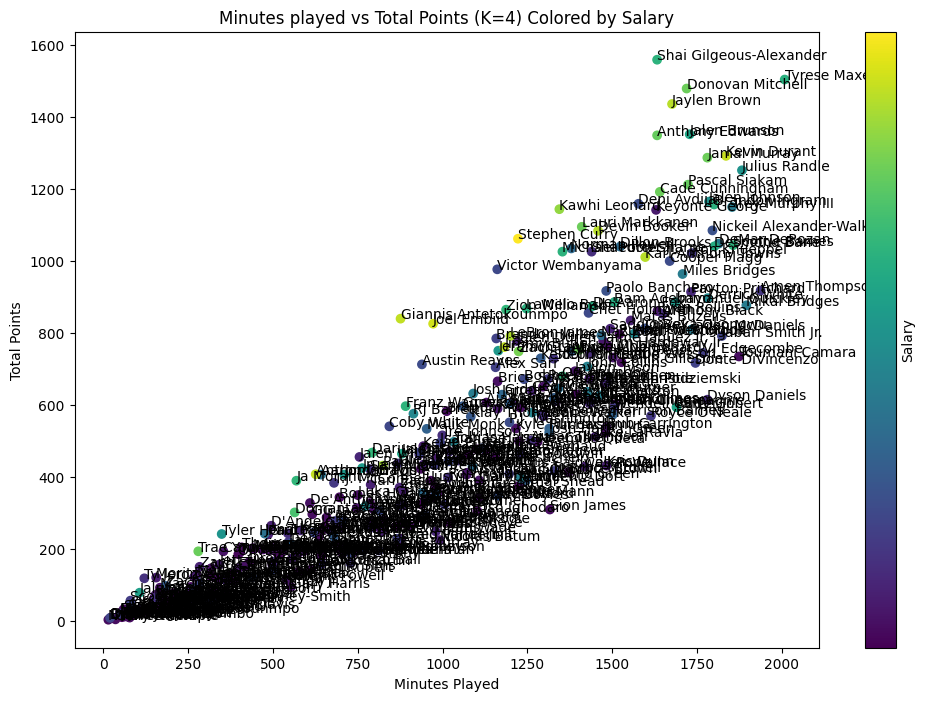

In [17]:
#Use the recommended number of cluster (assuming it's different) to retrain your model and visualize the results

#Based on estimated suggestion for number of clusters, I will use K=4 to retrain the model
kmeans = KMeans(n_clusters=4, random_state=42) #Assuming 4 is the recommended number of clusters based on the elbow method
kmeans.fit(duplicates_scaled)

duplicates['cluster'] = kmeans.labels_ #Reassign cluster labels using the new model as a reference

#Visualize results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(duplicates['MP'], duplicates['PTS'], c=duplicates['cluster'], cmap='viridis')
plt.colorbar(scatter, label='cluster', ticks=[0, 1, 2, 3]) #There are now 4 clusters

for i, row in duplicates.iterrows():
    plt.annotate(row['Player'],(row['MP'],row['PTS']))

plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Minutes played vs Total Points (K=4)')
plt.show()

plt.figure(figsize=(12, 8))
scatter = plt.scatter(duplicates['MP'], duplicates['PTS'], c=duplicates['2025-26'], cmap='viridis')
plt.colorbar(scatter, label='Salary', ticks=[0, 1, 2, 3]) #There are now 4 clusters

for i, row in duplicates.iterrows():
    plt.annotate(row['Player'],(row['MP'],row['PTS']))

plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Minutes played vs Total Points (K=4) Colored by Salary')
plt.show()


In [13]:
#Once again evaluate the quality of the clustering using total variance explained and silhouette scores
from sklearn.metrics import silhouette_score

#Begin calculating silhouette score
sil_score = silhouette_score(duplicates_scaled, kmeans.labels_)
print("Silhouette Score: ", sil_score)

# Calculate the total variance - the goal is to get the highest variance
total_variance = kmeans.inertia_
print("Total Variance: ", total_variance)

Silhouette Score:  0.19088825913062085
Total Variance:  2302.269338344713


In [13]:
#Use the model to select players for Mr. Rooney to consider

In [14]:
#Write up the results in a separate notebook with supporting visualizations and 
# an overview of how and why you made the choices you did. This should be at least 
# 500 words and should be written for a non-technical audience.